

# **Assignment 2**



Import necessary libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

from tensorflow.keras.datasets import fashion_mnist, cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D, Input, Activation, Concatenate, Add, UpSampling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model


Problem 1: Apply the following models on the Fashion Mnist Dataset. Train the model with the training data and evaluate the model with the test data.

Load Fashion MNIST Dataset

In [34]:
# Load and preprocess the Fashion MNIST dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# reshaping the image and specifying the gray scale, Normalizing the pixels to range between 0 and 1
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# one-hot encoding of labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


Construct a CNN Model

a. CNN model from scratch: Develop a CNN model with 4 convolutional layers (with kernel size= 3, stride =1, padding = “same”, activation function = “relu”) with following MaxPooling layer (Size= 2) and 3 fully connected layer (including one output layer). After each of the Convolutional layer apply Batch Normalization. In the fully connected layer apply dropout (rate 0.50). Show the learning curve. Report performance evaluation on the test data. 3 pts

In [35]:
def create_model():
  model = Sequential([

    # Convolutional layers 1 with Input layer for grey scaling, Batch Normalization and MaxPooling
      Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layers 2 with Batch Normalization and MaxPooling
      Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layers 3 with Batch Normalization and MaxPooling
      Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),

      # Convolutional layers 4 with Batch Normalization and MaxPooling
      Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
      BatchNormalization(),
      MaxPooling2D(pool_size=(2, 2)),

      # Flatten and fully connected layers with dropout
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.5),
      Dense(128, activation='relu'),
      Dropout(0.5),

      # Output layer with 10 classes for Fashion MNIST
      Dense(10, activation='softmax')
  ])
  return model

CNN Model Summary

In [37]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_75 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_76 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_76 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                        

**Conv2D Layers:** These are the convolutional layers that will extract features from the images. Each has a specified number of filters (e.g., 32, 64, 128, 256), a kernel size of 3x3, stride of 1, padding set to 'same' (input and output dimensions are the same), and the ReLU activation function.

**BatchNormalization:** Applied after each Conv2D layer to stabilize and speed up the training process by normalizing the inputs of each layer.

**MaxPooling2D:** Follows each convolutional layer (except the last convolutional layer set) to reduce the spatial dimensions (height and width) of the input volume for the next layer.

**Flatten:** Converts the 3D feature maps to 1D feature vectors to be fed into the fully connected layers.

**Dense Layers:** Fully connected layers that learn non-linear combinations of the high-level features extracted by the convolutional layers. Dropout is applied to reduce overfitting by randomly setting a fraction (0.5) of input units to 0 at each update during training time.

**Output Layer:** The final Dense layer with 10 units (one for each class of the Fashion MNIST dataset) and a softmax activation function to output a probability distribution over the 10 classes.

Compile and Train the Model

In [5]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 160s 208ms/step - loss: 0.5631 - accuracy: 0.8051 - val_loss: 0.3437 - val_accuracy: 0.8792
Epoch 2/10
750/750 [==============================] - 145s 193ms/step - loss: 0.3354 - accuracy: 0.8849 - val_loss: 0.2859 - val_accuracy: 0.8942
Epoch 3/10
750/750 [==============================] - 152s 202ms/step - loss: 0.2849 - accuracy: 0.9007 - val_loss: 0.2850 - val_accuracy: 0.8956
Epoch 4/10
750/750 [==============================] - 153s 204ms/step - loss: 0.2489 - accuracy: 0.9120 - val_loss: 0.2908 - val_accuracy: 0.8882
Epoch 5/10
750/750 [==============================] - 167s 222ms/step - loss: 0.2318 - accuracy: 0.9193 - val_loss: 0.2653 - val_accuracy: 0.9074
Epoch 6/10
750/750 [==============================] - 162s 216ms/step - loss: 0.2081 - accuracy: 0.9276 - val_loss: 0.2487 - val_accuracy: 0.9098
Epoch 7/10
750/750 [==============================] - 160s 213ms/step - loss: 0.1901 - accuracy: 0.9326 - val_loss: 0.2534 -

 Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc*100:.2f}%')


313/313 [==============================] - 9s 27ms/step - loss: 0.2906 - accuracy: 0.9127
Test Accuracy: 91.27%


The model achieved 91.27% accuracy which is good




Plot the Learning Curves



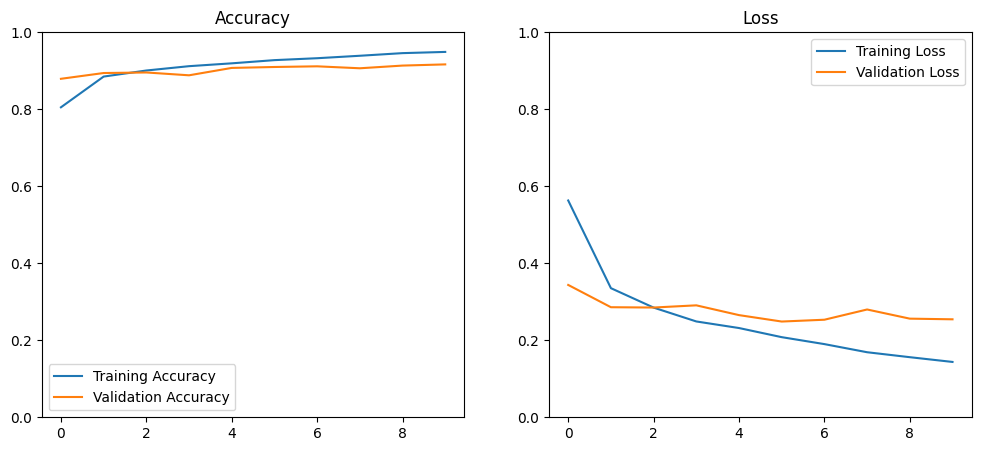

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.legend()
plt.show()

We can observe that the performance of the model is gradually increasing as the model is traind for increasing epochs. The loss is gradually decreasing as the model is learning.

b. Apply grid search on the CNN model to find the optimal set of hyperparameters that produce the max performance on the test data. You must train the model using the training data and evaluate model performance using the test dataset. Use grid search for hyperparameter tuning with the following: 3 pts You should not use any inbuilt package (like gridsearch) for grid search hyperparameter tuning. Write a for loop and find all possible combinations results.
Activation function for Hidden Layer:ReLU,
optimizer:Adam,Adagrad
Mini-batch size:4,8,16,32
Learning rate:0.001, 0.0001

Define Hyperparameters

In [38]:
# Define hyperparameters to tune
activation_finction = 'relu'
optimizers = {'adam': Adam, 'adagrad': Adagrad}
batch_sizes = [4, 8, 16, 32]
learning_rates = [0.001, 0.0001]

In [2]:
# Function to create model
def build_model(optimizer_name, learning_rate):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    optimizer = optimizers[optimizer_name](learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
# Grid search
best_accuracy = 0
best_hyperparams = {}

for optimizer_name in optimizers.keys():
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            model = build_model(optimizer_name, learning_rate)
            model.fit(train_images, train_labels, epochs=1, batch_size=batch_size, verbose=0)
            test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
            print(f"Optimizer: {optimizer_name}, Batch Size: {batch_size}, Learning Rate: {learning_rate}, Test Accuracy: {test_acc}")

            if test_acc > best_accuracy:
                best_accuracy = test_acc
                best_hyperparams = {'optimizer': optimizer_name, 'batch_size': batch_size, 'learning_rate': learning_rate}

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {best_hyperparams}")

Optimizer: adam, Batch Size: 4, Learning Rate: 0.001, Test Accuracy: 0.8565999865531921
Optimizer: adam, Batch Size: 4, Learning Rate: 0.0001, Test Accuracy: 0.867900013923645
Optimizer: adam, Batch Size: 8, Learning Rate: 0.001, Test Accuracy: 0.8684999942779541
Optimizer: adam, Batch Size: 8, Learning Rate: 0.0001, Test Accuracy: 0.8737999796867371
Optimizer: adam, Batch Size: 16, Learning Rate: 0.001, Test Accuracy: 0.8162000179290771
Optimizer: adam, Batch Size: 16, Learning Rate: 0.0001, Test Accuracy: 0.8614000082015991
Optimizer: adam, Batch Size: 32, Learning Rate: 0.001, Test Accuracy: 0.8654000163078308
Optimizer: adam, Batch Size: 32, Learning Rate: 0.0001, Test Accuracy: 0.8639000058174133
Optimizer: adagrad, Batch Size: 4, Learning Rate: 0.001, Test Accuracy: 0.8341000080108643
Optimizer: adagrad, Batch Size: 4, Learning Rate: 0.0001, Test Accuracy: 0.7235000133514404
Optimizer: adagrad, Batch Size: 8, Learning Rate: 0.001, Test Accuracy: 0.8348000049591064
Optimizer: adag

We can conclude form the above experiment that best parameters for a CNN model on 5 epochs are 'optimizer': 'adam', 'batch_size': 8, 'learning_rate': 0.0001 with the best accuracy of 87.37% which is exceptable

**c. Data Augmentation**: Apply five different image augmentation techniques on the Fashion Mnist train data to augment it and then apply the previously designed (from a) model on it. 2 pts

Performing data augmentation such as
1. Random rotation between 0 and 10 degrees
2. Random horizontal shift
3. Random vertical shift
4. Randomly flip inputs horizontally
5. Random zoom



In [10]:
# Create an instance of ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

compile model and fit the model with augmented data

In [21]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10)

Epoch 1/10
938/938 [==============================] - 28s 27ms/step - loss: 0.7344 - accuracy: 0.7352
Epoch 2/10
938/938 [==============================] - 23s 25ms/step - loss: 0.4902 - accuracy: 0.8234
Epoch 3/10
938/938 [==============================] - 24s 26ms/step - loss: 0.4290 - accuracy: 0.8472
Epoch 4/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3873 - accuracy: 0.8623
Epoch 5/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3699 - accuracy: 0.8686
Epoch 6/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3557 - accuracy: 0.8731
Epoch 7/10
938/938 [==============================] - 25s 27ms/step - loss: 0.3434 - accuracy: 0.8770
Epoch 8/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3333 - accuracy: 0.8799
Epoch 9/10
938/938 [==============================] - 23s 25ms/step - loss: 0.3207 - accuracy: 0.8856
Epoch 10/10
938/938 [==============================] - 24s 26ms/step - loss: 0.312

Test the augmented model

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc*100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.5140 - accuracy: 0.8506
Test Accuracy: 85.06%


The accuracy of the augmented model is less when compared to the plain CNN model from part a

d. Transfer Learning: Load the VGG-16 model. Drop after final pooling layer and on top of it add one global average pooling layer and one fully connected layer, and one final output layer. Keep the base model layers (VGG16) freeze. 2 pts

Reshape the input and convert images to 3 channels

In [3]:
# Load Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Convert images to 3 channels and resize (Example for resizing to 48x48)
train_images = np.repeat(train_images[..., np.newaxis], 3, axis=-1)
train_images = tf.image.resize(train_images, (48, 48)).numpy()
test_images = np.repeat(test_images[..., np.newaxis], 3, axis=-1)
test_images = tf.image.resize(test_images, (48, 48)).numpy()

# Normalize the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Load existing VGG16 model, define an input shape, freeze the base model and add GlobalAveragePooling, Fully connected layer and output layer to the freezed model

In [44]:
# Load VGG16 model, excluding its top layer (the classification layers)
base_model1 = VGG16()
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

Summary of base VGG16 Model, for imagenet. We can see that the imahe size is 224,224.

In [45]:
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Summary of VGG16 model after making changes for Fashion Mnist dataset, We can have a minimum of 32 and maximum of 224 as input size for VGG16 model. We are using a input size of 48*48

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

Compile , train and evaluate the accuracy of transfer learning VGG16 model

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 [==============================] - 29s 17ms/step - loss: 0.5009 - accuracy: 0.8217 - val_loss: 0.4065 - val_accuracy: 0.8539
Epoch 2/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3796 - accuracy: 0.8615 - val_loss: 0.3923 - val_accuracy: 0.8564
Epoch 3/5
1500/1500 [==============================] - 23s 16ms/step - loss: 0.3451 - accuracy: 0.8739 - val_loss: 0.3693 - val_accuracy: 0.8651
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3214 - accuracy: 0.8819 - val_loss: 0.3538 - val_accuracy: 0.8711
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 0.3601 - accuracy: 0.8739
Test accuracy: 0.8738999962806702


The test accuracy is 87.3% which is good

Problem 2 (10 pts): Developing ResNet model from scratch using CIFAR10 dataset
Apply a residual network specified in the following architecture. All convolutional layers use
kernel size 3, stride = 1, and padding = “same”,

drive link for .h5 model : https://drive.google.com/file/d/1vuzTm89esvkktVuhsO1SSAgjwD21Q3On/view?usp=drive_link


Load and preprocess CIFAR-10 dataset


In [7]:
# Load and preprocess CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

x_train_cifar = x_train_cifar / 255.0
x_test_cifar = x_test_cifar / 255.0

y_train_cifar_one_hot = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar_one_hot = to_categorical(y_test_cifar, num_classes=10)

170498071/170498071 [==============================] - 2s 0us/step


Build RESNET model

In [8]:
# Build RESNET model
def residual_unit(x, filters):
    shortcut = x

    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Concatenate()([shortcut, x])
    x = Activation('relu')(x)

    return x

def resnet():
    input = Input(shape=(32, 32, 3))

    x = Conv2D(32, kernel_size=3, padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    for _ in range(3):
        x = residual_unit(x, 32)

    for _ in range(3):
        x = residual_unit(x, 64)

    for _ in range(3):
        x = residual_unit(x, 128)

    x = GlobalAveragePooling2D()(x)

    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)
    return model

Compile and train the model

In [9]:
modeld = resnet()
# compiling the model
modeld.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
historyd = modeld.fit(x_train_cifar, y_train_cifar_one_hot, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 129s 88ms/step - loss: 1.4357 - accuracy: 0.4706 - val_loss: 1.7239 - val_accuracy: 0.4449
Epoch 2/5
1250/1250 [==============================] - 109s 87ms/step - loss: 1.0351 - accuracy: 0.6317 - val_loss: 1.6384 - val_accuracy: 0.5199
Epoch 3/5
1250/1250 [==============================] - 109s 87ms/step - loss: 0.8604 - accuracy: 0.6976 - val_loss: 2.9545 - val_accuracy: 0.4063
Epoch 4/5
1250/1250 [==============================] - 108s 87ms/step - loss: 0.7402 - accuracy: 0.7387 - val_loss: 1.2697 - val_accuracy: 0.6179
Epoch 5/5
1250/1250 [==============================] - 108s 86ms/step - loss: 0.6401 - accuracy: 0.7781 - val_loss: 1.4810 - val_accuracy: 0.4860


In [10]:
modeld.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 32)           0         ['batch_normalization[0][0

Evaluate the model

In [46]:
# evaluating the performance of model in test data

test_evald = modeld.evaluate(x_train_cifar,y_train_cifar_one_hot, verbose=0)

In [47]:
print('Test loss:', test_evald[0])
print('Test accuracy:', test_evald[1])

Test loss: 1.4475492238998413
Test accuracy: 0.49549999833106995


The model gives an accuracy of 49% which is poor. and a training loss of 1.447.

Store the model as a .h5 file in the drive to infer while testing

In [22]:
drive.mount('/content/drive')

# Save the model to Google Drive
modeld.save('/content/drive/My Drive/DL/ResNet.h5')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the predictions by infering the saved model

313/313 [==============================] - 8s 24ms/step
Actual Value is Cat
Predicted Value is Airplane


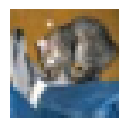

------------------


Actual Value is Ship
Predicted Value is Airplane


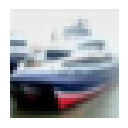

------------------


Actual Value is Ship
Predicted Value is Airplane


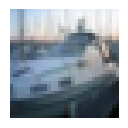

------------------


Actual Value is Airplane
Predicted Value is Airplane


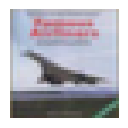

------------------


Actual Value is Frog
Predicted Value is Airplane


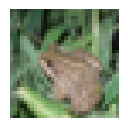

------------------


Actual Value is Frog
Predicted Value is Airplane


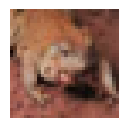

------------------


Actual Value is Automobile
Predicted Value is Airplane


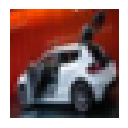

------------------


Actual Value is Frog
Predicted Value is Airplane


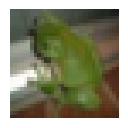

------------------


Actual Value is Cat
Predicted Value is Airplane


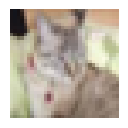

------------------




In [32]:
from tensorflow.keras.models import load_model

# Load the trained ResNet model
cifar_trainedmodel = load_model('/content/drive/My Drive/DL/ResNet.h5')

# Make predictions on the testing data
predictiond = cifar_trainedmodel.predict(x_test_cifar)
predictiond = np.argmax(np.round(predictiond), axis=1)

# Dictionary to match class numbers with items
items_dict = {
    0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',
    5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'
}

# Mapping actual labels numbers to items
y_testcifar1 = [items_dict[label[0]] for label in y_test_cifar]
predictiond1 = [items_dict[prediction.argmax()] for prediction in predictiond]

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Printing first nine predicted and actual values
for i in range(9):
    print("Actual Value is", y_testcifar1[i])
    print("Predicted Value is", predictiond1[i])
    plt.subplot(3, 3, i + 1)
    show_image(x_test_cifar[i])
    print("------------------")
    print("\n")


As we can see the accuracy of the model is low and the predictions are mostly incorrect

The reason for the poor preformance is the lack of computational power.
With T4 GPU in colab i was not able to run the model to desiderd epochs as i exhausted the tier limits
Traning the model with larger dataset why increaing the epochs with hyperparameter tuning will increase the accuracy
